# TM10007 Assignment template

In [12]:
# Run this to use from colab environment
#!pip install -q --upgrade git+https://github.com/karinvangarderen/tm10007_project.git

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [1]:
# Import functions
from brats.load_data import load_data
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import pandas as pd 
from sklearn import svm 
import matplotlib.pyplot as plt
from sklearn import feature_selection 
from sklearn import model_selection

In [2]:
# Import data
data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

The number of samples: 167
The number of columns: 725


In [3]:
remove_features = data.T[data.isna().sum(axis=0) < 130]
removed_features = remove_features.T
print(f'The number of samples: {len(removed_features)}')
print(f'The number of columns: {len(removed_features.columns)}')

#remove_patients= removed_features[removed_features.isna().sum(axis=1) < 400]
#print(f'The number of samples: {len(remove_patients)}')
#print(f'The number of columns: {len(remove_patients.columns)}')

The number of samples: 167
The number of columns: 705


In [43]:
# replace NaNs
# clean_data = KNNImputer(n_neighbors=10)
# clean_data.fit_transform(features)

# without_labels = remove_patients.drop('label', axis=1)
# without_labels.replace(r'#DIV/0!', 0)
# clean_data = without_labels.replace(np.NaN, without_labels.mean(axis = 0))
# clean_data.isna().sum().sum()

#print(remove_patients.isna().sum().sum())
#new = remove_patients.replace(r'#DIV/0!', 0, regex=True)
#print(new.isna().sum().sum())
#clean_data = new.replace(np.NaN, remove_patients.mean(axis = 0))
#print(clean_data.isna().sum().sum())



In [4]:
# Extract labels and features
#label = clean_data['label'].to_numpy()
#features = clean_data.drop('label', axis=1).to_numpy()

#features = removed_features.drop('label', axis=1)
#replace_div = features.replace(r'#DIV/0!', 'nan', regex=True)
#new = replace_div.replace(np.inf, np.nan, regex=True)

label = removed_features['label'].to_numpy() #extract labels
features = removed_features.drop('label', axis=1) #dropped laatste kolom (labels)
replace_div = features.replace(r'#DIV/0!', 'nan', regex=True) #DIV's worden vervangen door nan 
replace_inf = replace_div.replace(np.inf, np.nan, regex=True) #inf wordt vervangen door nan

feature_names = list(replace_inf.columns) #extract feature names
imputer = KNNImputer(n_neighbors=10) #definieert functie K-nearest neighbor imputer
clean_data = imputer.fit_transform(replace_inf) #alle nan's worden vervangen op basis van k-NN imputer
#clean_data = pd.DataFrame(data=clean_data) #transform numpy array to dataframe
#clean_data.columns = feature_names #add feature names


#clean_data = replace_inf.replace(np.nan, removed_features.mean(axis = 0)) #alle nan's worden vervangen door mean van kolom

In [5]:
#convert labels to true and false
labels = label=='GBM'

In [6]:
def our_pca(data_train, data_test, label_train, label_test, j=20):
    """
    This function calculates the PCA for j principal components
    """

    #Standard Scaling
    scaler = StandardScaler().fit(data_train)
    data_train = scaler.transform(data_train)
    data_test = scaler.transform(data_test)

    #Train on trainingsdata and apply PCA
    pca = PCA(n_components=j).fit(data_train)
    train_array = pca.transform(data_train)
    test_array = pca.transform(data_test)

    #Transform to numpy and from array to float
    label_train_array = label_train.squeeze().astype(np.int)
    label_test_array = label_test.squeeze().astype(np.int)

    return(train_array, test_array, label_train_array, label_test_array)


In [8]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SequentialFeatureSelector
# def feat_select(data_train2, label_train2):
#     svc = svm.SVC(kernel="poly", max_iter=1000)
#     rfecv = feature_selection.RFECV(
#     estimator=svc, step=1, 
#     cv=model_selection.StratifiedKFold(4),
#     scoring='roc_auc')
#     rfecv.fit(data_train2, label_train2)
#     plt.figure()
#     plt.xlabel("Number of features selected")
#     plt.ylabel("Cross validation score (nb of correct classifications)")
#     plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#     plt.show()


In [9]:
# Split data in training en test
#rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=36851234)
from sklearn.model_selection import StratifiedKFold
rskf = StratifiedKFold(n_splits=5) #ik heb random state verwijderd, daardoor worden steeds dezelfde r splits gemaakt
rskf2 = StratifiedKFold(n_splits=6)
# waarvoor was dit bedoeld? 

for train_index, test_index in rskf.split(features, label):
    print("TRAIN:", train_index, "TEST:", test_index)
    data_train, data_test = clean_data[train_index], clean_data[test_index]
    label_train, label_test = labels[train_index], labels[test_index]
    train_array, test_array, label_train_array, label_test_array = our_pca(data_train, data_test, label_train, label_test)
    for train_index2, validation_index in rskf2.split(data_train, label_train):
        data_train2, data_validation = data_train[train_index2], data_train[validation_index]
        label_train2, label_validation = label_train[train_index2], label_train[validation_index]
        train_array2, validation_array, label_train_array, label_validation_array = our_pca(data_train2, data_validation, label_train2, label_validation)
        print("TRAIN:", train_index2, "Validation:", validation_index)


# PCA op training en test


58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20 102 103 104 105 106 107 108 109 110 111 112 113 114]
TRAIN: [ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132] Validation:

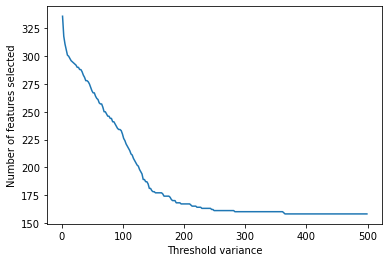

<AxesSubplot:>

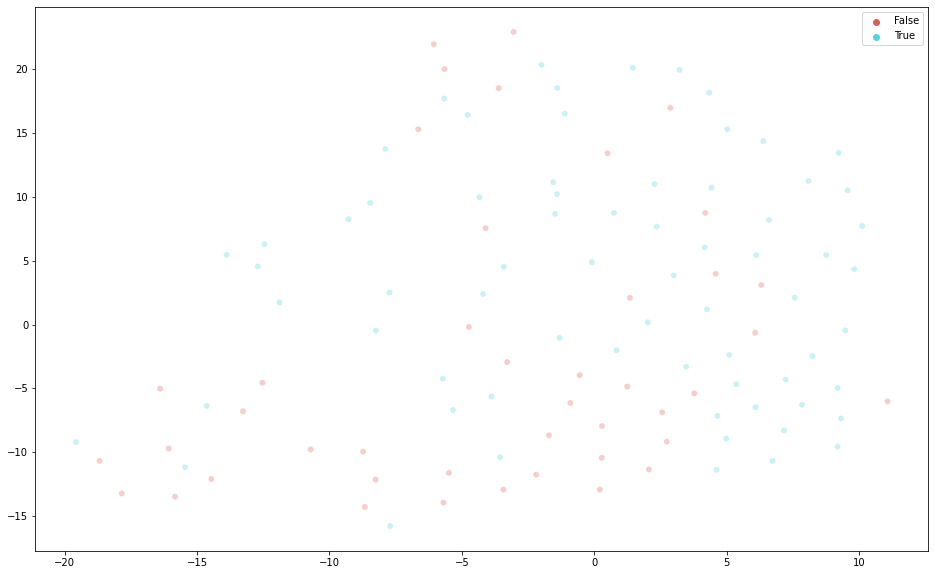

In [33]:
# feat_select(data_train2, label_train2)

from sklearn import feature_selection
features = []
for i in range(1,500, 2):
    sel = feature_selection.VarianceThreshold(i)
    train_variance = sel.fit_transform(data_train2)
    samples, feature = train_variance.shape
    features.append(feature)

plt.figure()
plt.xlabel("Threshold variance")
plt.ylabel("Number of features selected")
plt.plot(range(1,500, 2), features)
plt.show()

sel = feature_selection.VarianceThreshold(300)
train_variance = sel.fit_transform(data_train2)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2,random_state=5)
tsne_results = tsne.fit_transform(data_train2)

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=label_train2,
    palette=sns.color_palette("hls", 2),
    data=data_train2,
    legend="full",
    alpha=0.3
)
# # find correlations to target
# corr_matrix = data_train2.corr().abs()
# print(corr_matrix['target'].sort_values(ascending=False).head(10))

# # Find index of feature columns with high correlation
# to_drop = [column for column in matrix.columns if any(matrix[column] > 0.50)]
# print('Columns to drop: ' , (len(to_drop)))

<AxesSubplot:>

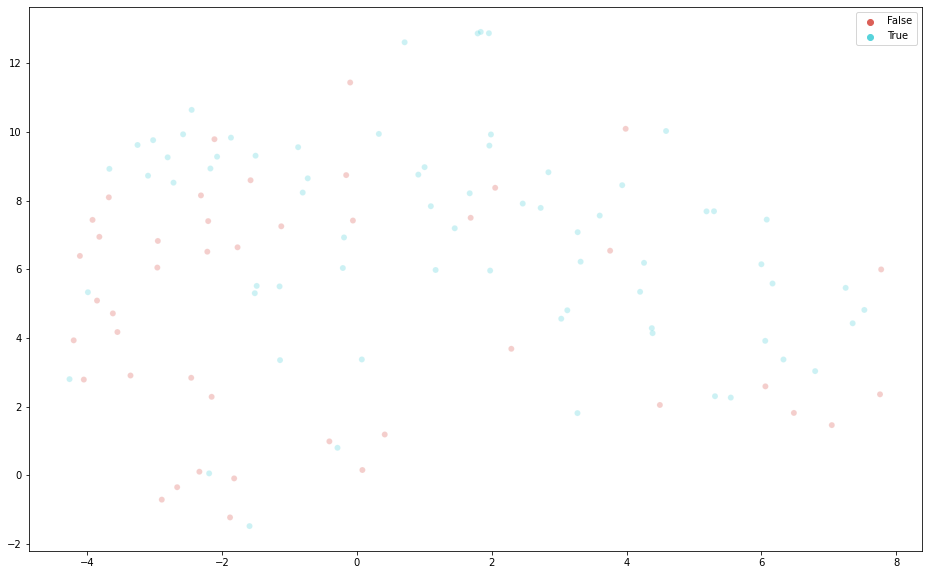

In [37]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data_train2.shape

data_train_new= SelectKBest(chi2, k=20).fit_transform(abs(data_train2), label_train2)
data_train_new.shape

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2,random_state=5)
tsne_results = tsne.fit_transform(data_train_new)

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=label_train2,
    palette=sns.color_palette("hls", 2),
    data=data_train_new,
    legend="full",
    alpha=0.3
)